<a href="https://colab.research.google.com/github/ChrisRogers2/ChrisLandingpage.github.io/blob/main/chris_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project**

Sports Final Project
Christopher Rogers

## **Problem Definition**

**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What are we trying to solve using data science?



## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'.
Each of these folders has _______ subfolders:

Give details about the dataset here.




## **Important Notes**

- This notebook can be considered a starter to use for your project.  You will be cutting and pasting from other notebooks to include those techniques in your project.  

- In the notebook, there are markdown cells called Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques.

You will be using the Keras imagegenerator for your project so you must use the techniques that are suited for this methodology in your notebook.

## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the Libraries**

In [ ]:
#Necessary to format your data into correct folders
#!pip install split-folders

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import zipfile
from PIL import Image
#from splitfolders import *

# Importing Deep Learning Libraries

from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, LeakyReLU, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential

import tensorflow as tf
tf.config.run_functions_eagerly(True)
import keras
import seaborn as sns

# Importing all the required sub-modules from Keras
from keras.applications.vgg16 import VGG16

from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical # To perform one-hot encoding
from tensorflow.keras.optimizers import RMSprop, Adam, SGD # Optimizers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping  # Regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import losses, optimizers
from google.colab.patches import cv2_imshow

import warnings
warnings.filterwarnings('ignore')

### **Let us load the data**

**Note:**
- You must download the dataset assigned to you in the shared google folder.

- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [ ]:
# Storing the path of the data file from the Google drive
path="/content/drive/MyDrive/Colab Notebooks/archive (2).zip"
#path='/content/drive/MyDrive/acolab/Sports/archive.zip'
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall(path='sports/')
# The data is provided as a zip file so we need to extract the files from the zip file




In [ ]:
old_name=r'/content/sports/valid'
new_name=r'/content/sports/val'
os.rename(old_name,new_name)

In [ ]:
picture_size = 224
folder_path = "sports/"

In [ ]:
#import pandas as pd
#sports_df=pd.read_csv('/content/sports/sports.csv')
#CATEGORIES= list(sports_df.groupby("labels")["labels"].first())
#print(CATEGORIES)

In [ ]:
CATEGORIES=['archery','baseball', 'basketball','bowling', 'boxing','football', 'formula 1 racing','high jump', 'hockey','lacrosse']

In [ ]:
#pip install split-folders
#import split_folders # or import splitfolders
#input_folder = ""
##output = "" #where you want the split datasets saved.
#one will be created if it does not exist or none is set

#split.ratio(input_folder, output=output, seed=42, ratio=(.85, .1,.05))
# ratio of split are in order of train/val/test. You can change to whatever you want.
#For train/val sets only, you could do .75, .25 for example.

In [ ]:
#See size of image
filepath = "/content/sports/test/air hockey/1.jpg"
img = Image.open(filepath)

# get width and height
width,height = img.size

# display width and height
print("The height of the image is: ", height)
print("The width of the image is: ", width)

The height of the image is:  224
The width of the image is:  224


## **Visualizing our Classes**

Let's look at our classes.

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

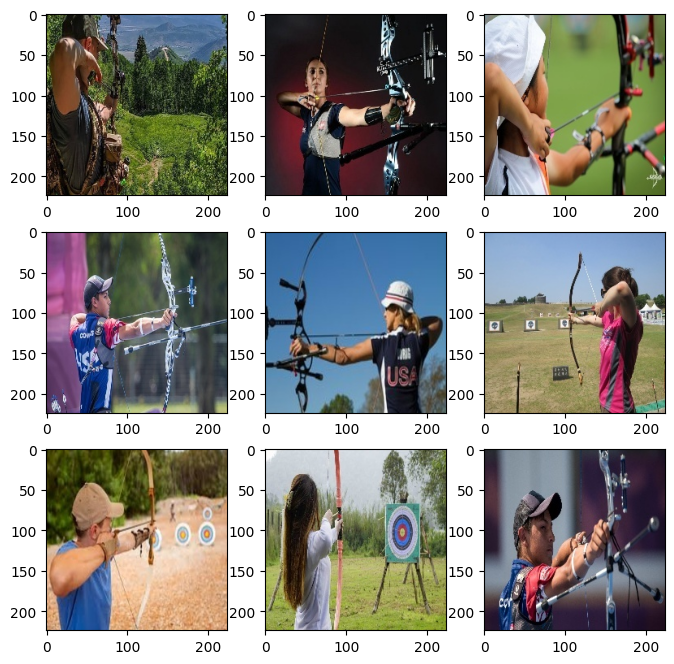

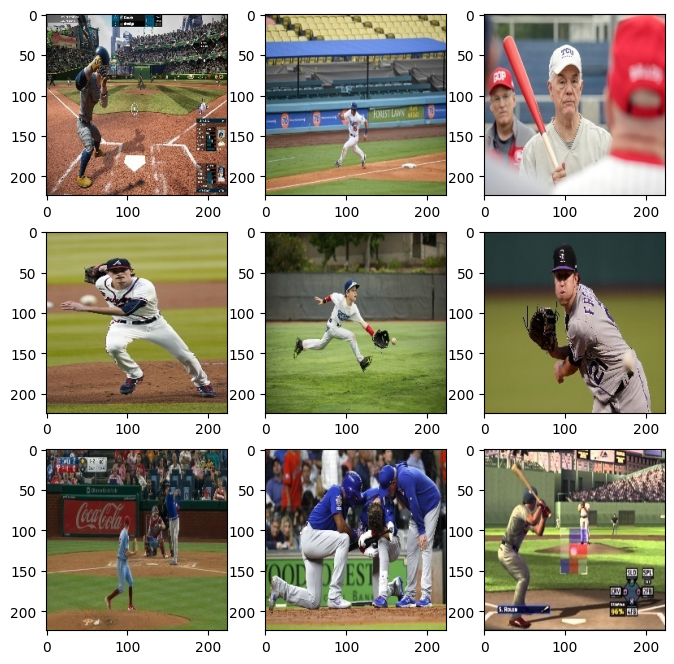

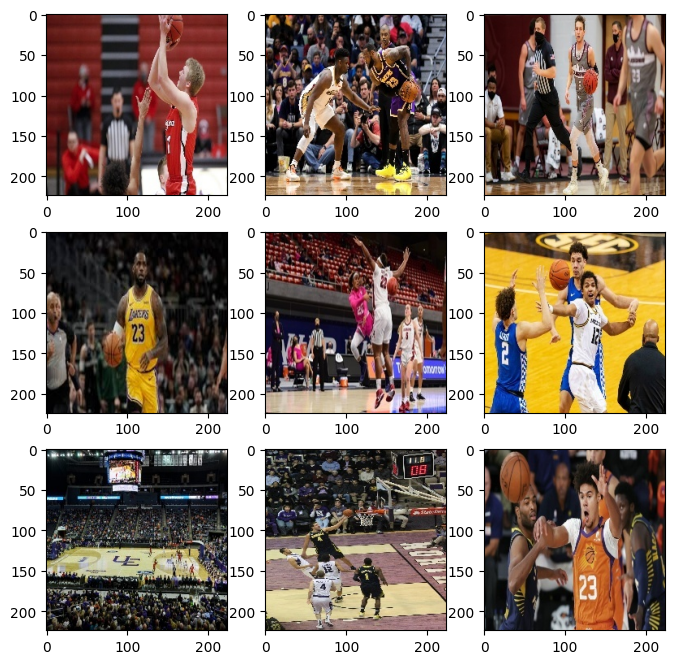

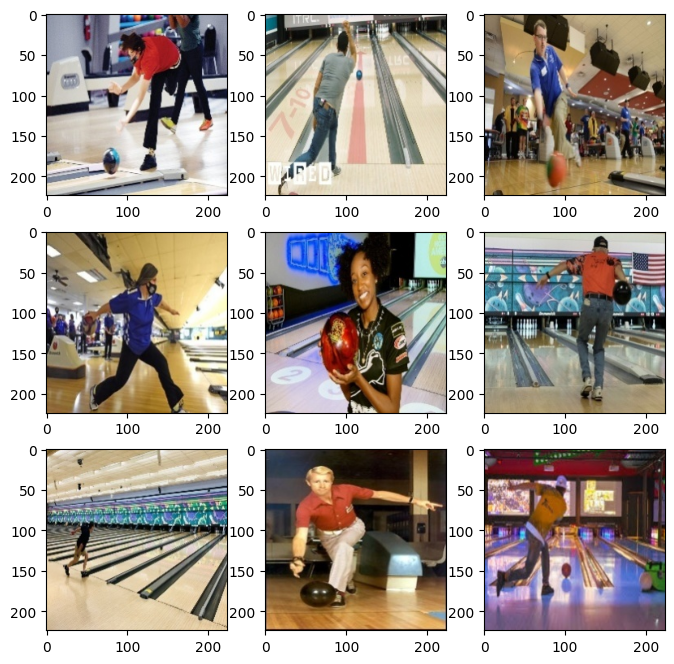

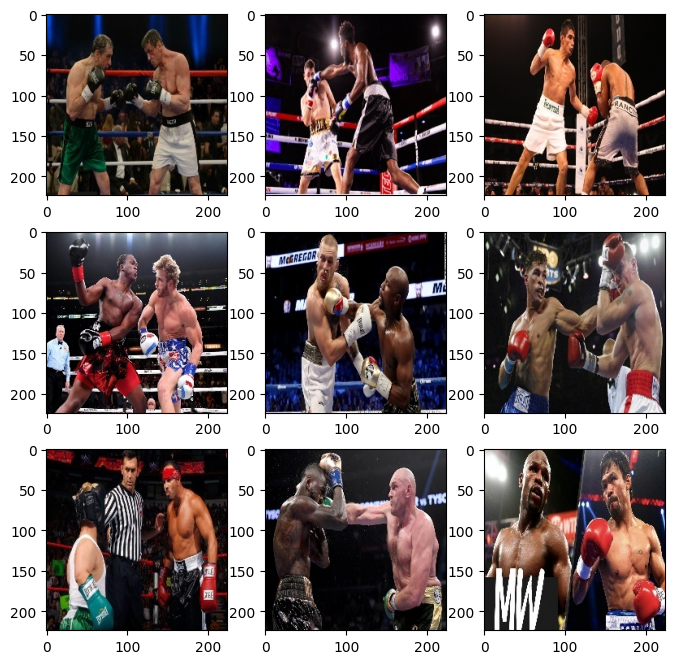

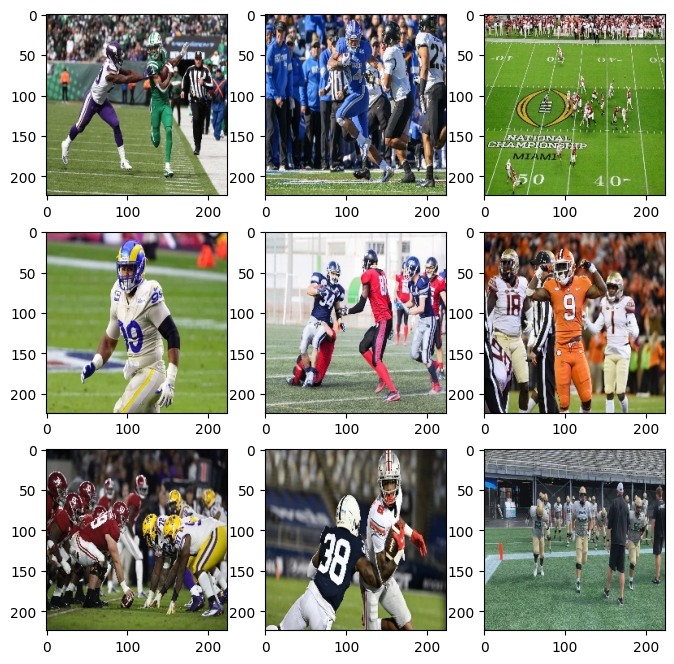

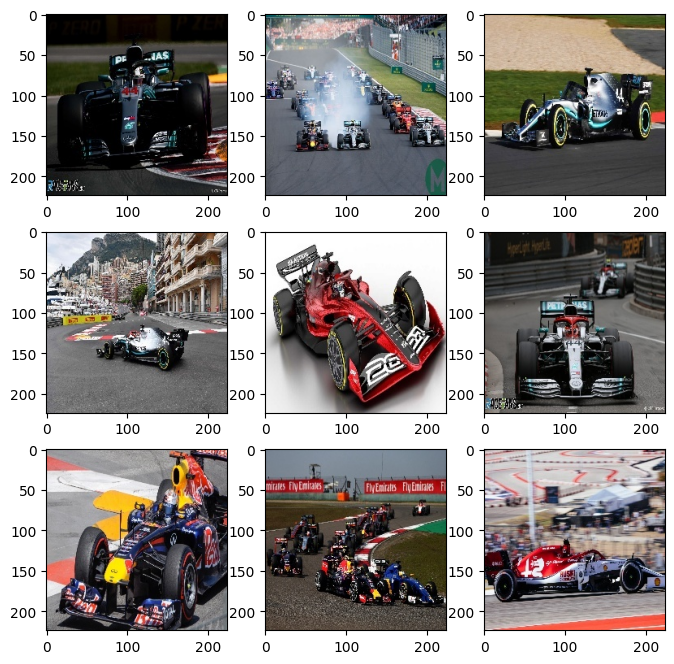

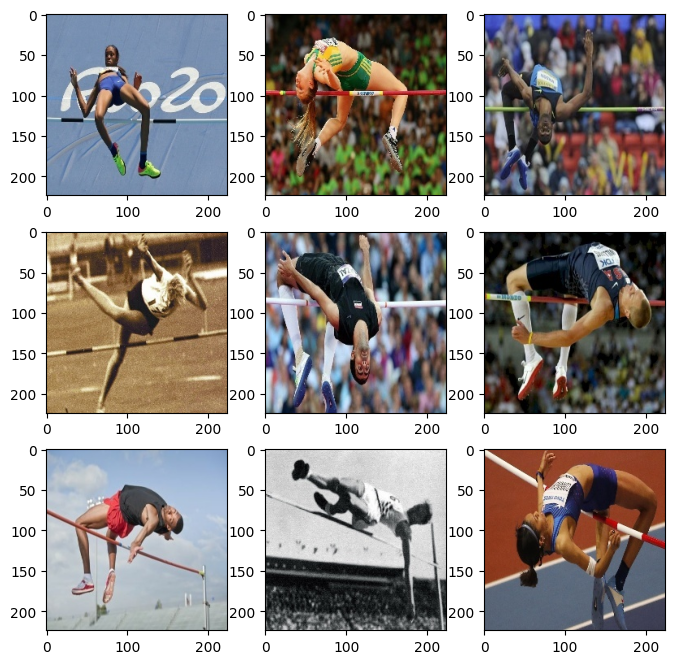

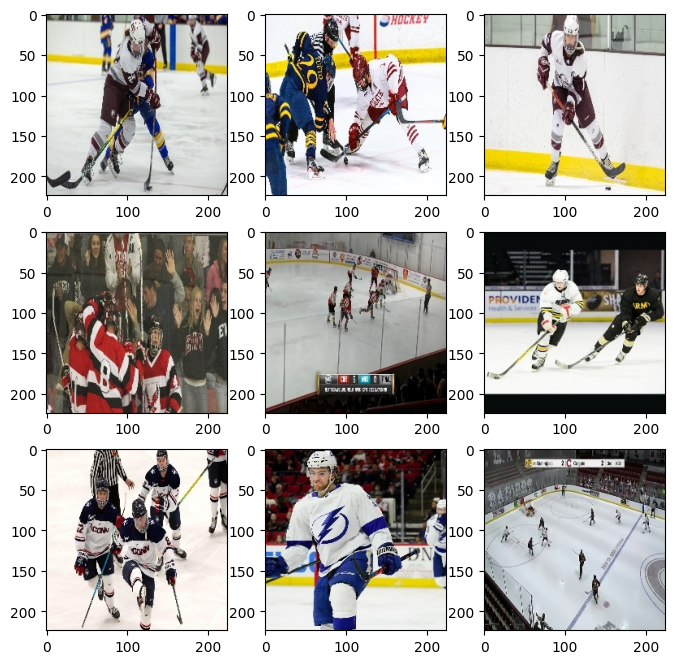

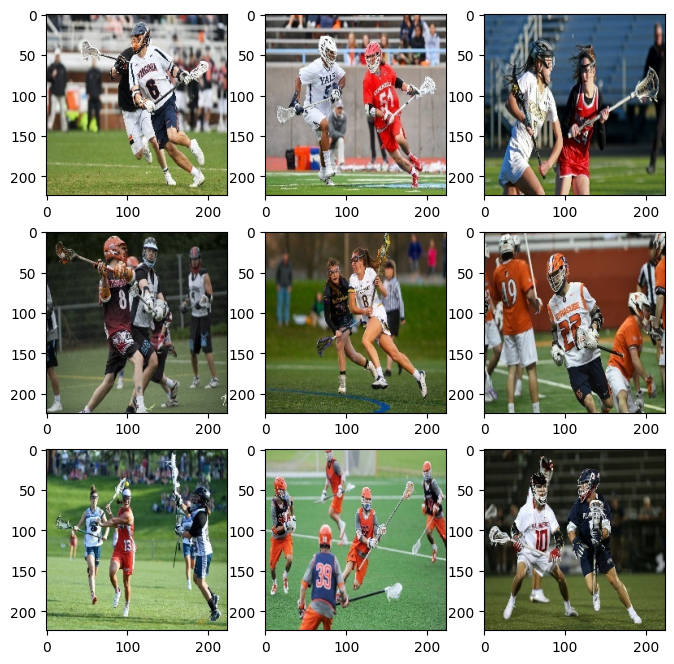

In [ ]:
#For loop to display images
ctr=0
for category in CATEGORIES:
  if ctr<10:
    expression = category
    plt.figure(figsize=(8,8))
    ctr = ctr +1
    for i in range(1,10,1):
      plt.subplot(3,3,i)
      img= load_img(folder_path + "train/" + expression + "/" +
                    os.listdir(folder_path + "train/" + expression)[i], target_size= (224,224))
      plt.imshow(img)
    plt.show()













In [ ]:
# Getting count of images in each folder within our training path
num = len(os.listdir(folder_path + "train/archery"))
print("Number of images in the class '':   ", num)

Number of images in the class '':    132


In [ ]:
#For loop to display number of images for each class
tot=0
for category in CATEGORIES:
  num=len(os.listdir(folder_path + "train/" + category))
print("number of images in class:", category, ": ",num)
tot=tot+num
print('*'* 50)

for category in CATEGORIES:
  num=len(os.listdir(folder_path + "train/" + category))
print("number of images in class:", category, ": ",round(num/tot,2))
#For loop to display percent of images for each class









number of images in class: lacrosse :  151
**************************************************
number of images in class: lacrosse :  1.0


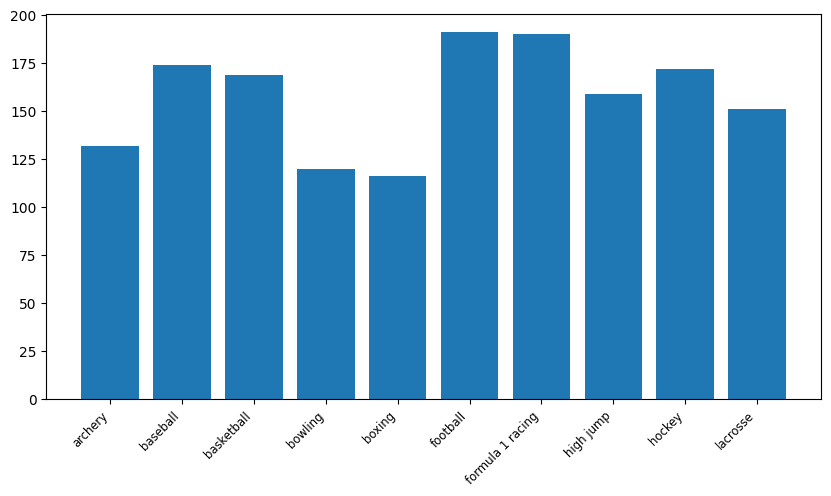

In [ ]:
#Plot histogram here showing number of images in each class

data={}
for category in CATEGORIES:
  num=len(os.listdir(folder_path + "train/" + category))
  data[category]=num

plt.figure(figsize=(10,5))
df=pd.Series(data)


plt.bar(range(len(df)), df.values, align="center")

plt.xticks(range(len(df)), df.index.values, size= "small")
plt.xticks(rotation=45, ha="right")
plt.show()












**Observations and Insights:__**

**Observations and Insights:__**

**Think About It:**
* Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress?
* Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?

## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. A sample of the required code has been given with respect to the training data. Please create the data loaders for validation and test set accordingly.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

In [ ]:
TARGET_SIZE = (224, 224)

train_path=folder_path + 'train/'
val_path=folder_path + 'val/'

datagen = ImageDataGenerator(
            width_shift_range=0.2,
            height_shift_range=0.2,
            brightness_range = (0.3, 0.9),
            zoom_range=0.2)

In [ ]:
def Augmentation(path, capacity):
    for category in CATEGORIES:
        #if category == 'Turtle_Tortoise':
         #   continue

        image_directory = path  + category + '/'
        SIZE = TARGET_SIZE[0]
        dataset = []

        print(image_directory)
        my_images = os.listdir(image_directory)
        for i, image_name in enumerate(my_images):
            if ((image_name.split('.')[1] == 'jpg')):
                image = load_img(image_directory + image_name, target_size = TARGET_SIZE)
                image = img_to_array(image)
                dataset.append(image)

        x = np.array(dataset)
        i = 0
        for batch in datagen.flow(x, batch_size=16,
                                save_to_dir= path + category + '/',
                                save_prefix='aug',
                                save_format='jpg'):
            i += 1
            if i > capacity:
                break

In [ ]:
Augmentation(train_path, 20)
Augmentation(val_path, 5)

sports/train/archery/
sports/train/baseball/
sports/train/basketball/
sports/train/bowling/
sports/train/boxing/
sports/train/football/
sports/train/formula 1 racing/
sports/train/high jump/
sports/train/hockey/
sports/train/lacrosse/
sports/val/archery/
sports/val/baseball/
sports/val/basketball/
sports/val/bowling/
sports/val/boxing/
sports/val/football/
sports/val/formula 1 racing/
sports/val/high jump/
sports/val/hockey/
sports/val/lacrosse/


In [ ]:
batch_size  = 32
img_size = 224

datagen_train  = ImageDataGenerator(
    #rotation_range=5,  # rotation
                                   width_shift_range=0.2,  # horizontal shift
                                   shear_range=0.3,  # zoom
                                  rescale=1./255,
                                   horizontal_flip=True,  # horizontal flip
                                   brightness_range=[0.,2.])  # brightness

datagen_val = ImageDataGenerator(rescale=1./255)
datagen_test = ImageDataGenerator(rescale=1./255)



train_set = datagen_train.flow_from_directory(folder_path + 'train/',
                                              target_size = (img_size, img_size),
                                              color_mode = "rgb",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = CATEGORIES,
                                              shuffle = True)


val_set = datagen_val.flow_from_directory(folder_path + 'val',
                                              target_size = (img_size, img_size),
                                              color_mode = "rgb",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = CATEGORIES,
                                              shuffle = False)


test_set = datagen_test.flow_from_directory(folder_path + 'test',
                                              target_size = (img_size, img_size),
                                              color_mode = "rgb",
                                              batch_size = 50,
                                              class_mode = 'categorical',
                                              classes = CATEGORIES,
                                              shuffle = False)

Found 4831 images belonging to 10 classes.
Found 350 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [ ]:
#datagen_val = ImageDataGenerator()
#datagen_test = ImageDataGenerator()

## **Model Building from rice**

**Think About It:**
* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead?
* What are the advantages of CNNs over ANNs and are they applicable here?

In [ ]:
# yes because Ann only will get confused on different angles for instance axe throwing if the axe is at a diff angle it wont recognize

### First lets build an ANN

In [ ]:
from tensorflow.keras import backend


# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
annmodel_1 = Sequential([

    # Adding Flatten layer
    Flatten(input_shape = (224, 224, 3)),

    # Dense or Fully Connected Layers
    Dense(512, activation = 'relu'),
    Dense(256, activation = 'relu'),

    # Classifier
    Dense(10, activation = 'softmax')
])

# Compiling the model
annmodel_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy',  metrics = ['accuracy'])

# Printing out the model summary
annmodel_1.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 512)               77070848  
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 77204746 (294.51 MB)
Trainable params: 77204746 (294.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Train the model here
history1 = annmodel_1.fit(train_set, validation_data = val_set, epochs = 2)

Epoch 1/2
151/151 [==============================] - 71s 458ms/step - loss: 22.9753 - accuracy: 0.1561 - val_loss: 8.6714 - val_accuracy: 0.2400
Epoch 2/2
151/151 [==============================] - 73s 483ms/step - loss: 4.1308 - accuracy: 0.2060 - val_loss: 2.4496 - val_accuracy: 0.2371


### **Evaluating the Model on the Test Set**

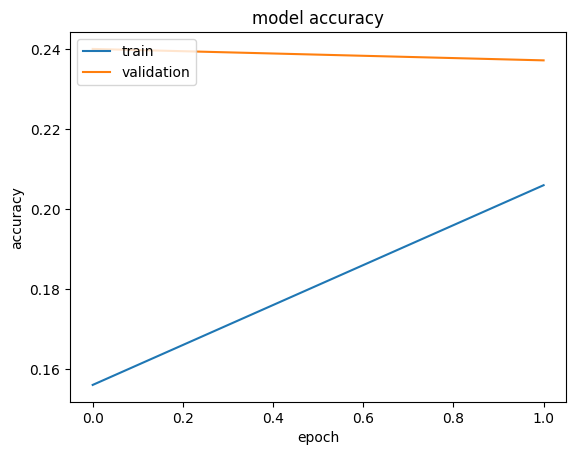

In [ ]:
#Plot the training below
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()






In [ ]:
#Get your test images and labels from your generator


test_images, test_labels = next(test_set)
accuracy = annmodel_1.evaluate(test_images, test_labels, verbose = 2)

2/2 - 0s - loss: 2.3134 - accuracy: 0.3400 - 88ms/epoch - 44ms/step


2/2 [==============================] - 0s 11ms/step


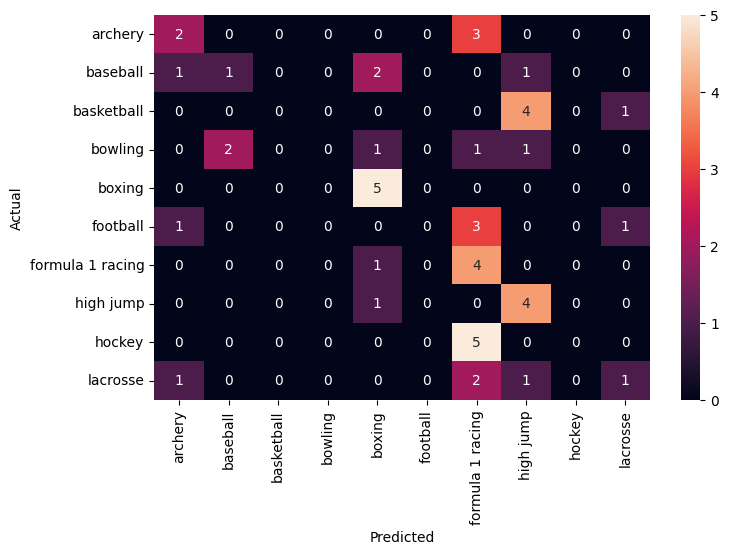

In [ ]:
#Confusion matrix and classification report
#from sklearn.metrics import classification_report
#from sklearn.metrics import confusion_matrix

#pred = annmodel_1.predict(X_test)
#pred = np.argmax(pred, axis = 1)
#y_true = np.argmax(y_test_encoded, axis = 1)

# Printing the classification report
#print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
#cm = confusion_matrix(y_true, pred)
#plt.figure(figsize = (8, 5))
#sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels =CATEGORIES, yticklabels=CATEGORIES)
#plt.ylabel('Actual')
#plt.xlabel('Predicted')
#plt.show()
#####
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = annmodel_1.predict(test_images)
pred = np.argmax(pred, axis = 1)
y_true = np.argmax(test_labels, axis = 1)

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['archery','baseball', 'basketball','bowling', 'boxing','football', 'formula 1 racing','high jump', 'hockey','lacrosse'], yticklabels = ['archery','baseball', 'basketball','bowling', 'boxing','football', 'formula 1 racing','high jump', 'hockey','lacrosse'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Printing the classification report


# Plotting the heatmap using confusion matrix


### **Creating the Base Neural Network**

Our Base Neural network will be a fairly simple model architecture.

* We want our Base Neural Network architecture to have 3 convolutional blocks.
* Each convolutional block must contain one Conv2D layer followed by a maxpooling layer and one Dropout layer. We can play around with the dropout ratio.
* Add first Conv2D layer with **64 filters** and a **kernel size of 2**. Use the 'same' padding and provide the **input_shape = (224, 224, 3) if you are using 'rgb' color mode in your dataloader or else input shape = (48, 48, 1) if you're using 'grayscale' colormode**. Use **'relu' activation**.
* Add MaxPooling2D layer with **pool size = 2**.
* Add a Dropout layer with a dropout ratio of 0.2.
* Add a second Conv2D layer with **32 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.**
* Follow this up with a similar Maxpooling2D layer like above and a Dropout layer with 0.2 Dropout ratio to complete your second Convolutional Block.
* Add a third Conv2D layer with **32 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.** Once again, follow it up with a Maxpooling2D layer and a Dropout layer to complete your third Convolutional block.
* After adding your convolutional blocks, add your Flatten layer.
* Add your first Dense layer with **512 neurons**. Use **'relu' activation function**.
* Add a Dropout layer with dropout ratio of 0.4.
* Add your final Dense Layer with appropriate number of neurons to match your classes and **'softmax' activation function**
* Print your model summary

In [ ]:
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
optimizer = Adam(learning_rate = 0.001)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 batch_normalization (Batch  (None, 110, 110, 64)      256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 106, 106, 128)     204928    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 128)       0

In [ ]:
from tensorflow.keras import layers
model = Sequential([
    layers.Conv2D(64, (5,5), activation='relu', padding= 'valid', input_shape=(224,224,3)),
    layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    BatchNormalization(),

    layers.Conv2D(128, (5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    BatchNormalization(),

    layers.Conv2D(256, (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    BatchNormalization(),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    BatchNormalization(),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
     tf.keras.layers.Dropout(0.35),
    layers.Dense(10, activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 batch_normalization (Batch  (None, 110, 110, 64)      256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 106, 106, 128)     204928    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 128)       0

In [ ]:
#Using early stopping to conserve on compute resources and time
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('best_model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True,save_weights_only=True,)
rl = ReduceLROnPlateau(monitor='val_loss',factor=.2,patience=3,verbose=1,min_delta=.0001)

In [ ]:
history=model.fit_generator(
        train_set,
        steps_per_epoch=len(train_set),
        epochs=30,
        validation_data=val_set,
        validation_steps=len(val_set),
        callbacks = [es, mc, rl])

Epoch 1/30
151/151 [==============================] - ETA: 0s - loss: 1.0515 - accuracy: 0.6286
Epoch 1: val_accuracy did not improve from 0.73429
151/151 [==============================] - 105s 691ms/step - loss: 1.0515 - accuracy: 0.6286 - val_loss: 0.8045 - val_accuracy: 0.7114 - lr: 4.0000e-05
Epoch 2/30
151/151 [==============================] - ETA: 0s - loss: 1.0477 - accuracy: 0.6268
Epoch 2: val_accuracy did not improve from 0.73429
151/151 [==============================] - 81s 534ms/step - loss: 1.0477 - accuracy: 0.6268 - val_loss: 0.7753 - val_accuracy: 0.7314 - lr: 4.0000e-05
Epoch 3/30
151/151 [==============================] - ETA: 0s - loss: 1.0263 - accuracy: 0.6404
Epoch 3: val_accuracy did not improve from 0.73429
151/151 [==============================] - 80s 531ms/step - loss: 1.0263 - accuracy: 0.6404 - val_loss: 0.8097 - val_accuracy: 0.7200 - lr: 4.0000e-05
Epoch 4/30
151/151 [==============================] - ETA: 0s - loss: 1.0174 - accuracy: 0.6396
Epoch 4: 

### **Compiling and Training the Model**

2/2 [==============================] - 2s 2s/step


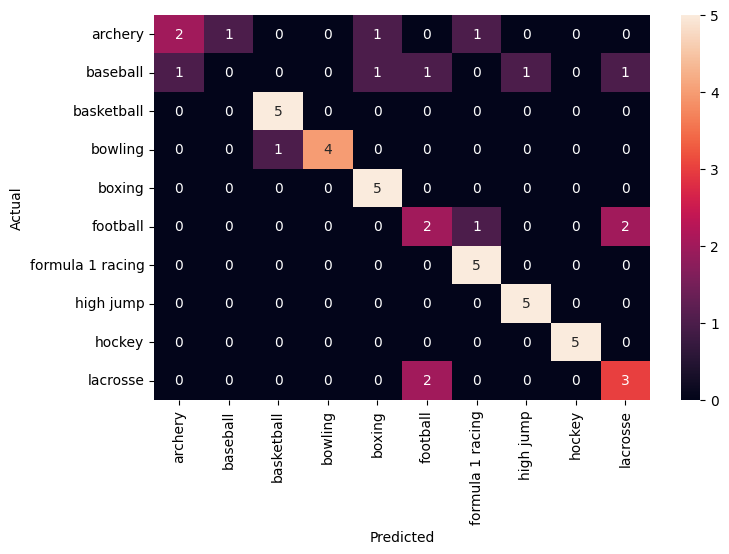

In [ ]:
#Evaluate your model on the test set here
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model.predict(test_images)
pred = np.argmax(pred, axis = 1)
y_true = np.argmax(test_labels, axis = 1)

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['archery','baseball', 'basketball','bowling', 'boxing','football', 'formula 1 racing','high jump', 'hockey','lacrosse'], yticklabels = ['archery','baseball', 'basketball','bowling', 'boxing','football', 'formula 1 racing','high jump', 'hockey','lacrosse'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

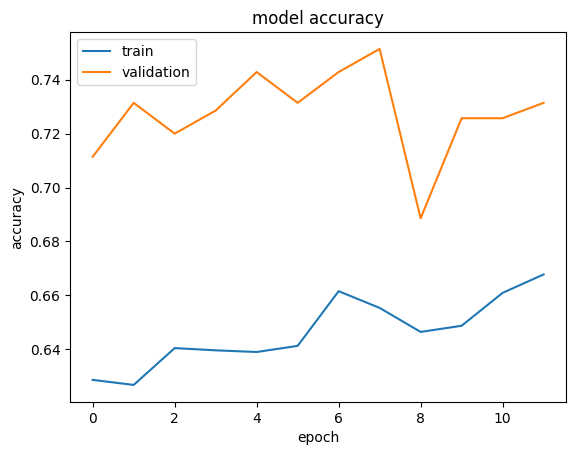

In [ ]:
#Plot the training below
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### **Evaluating the Model on the Test Set**

**Observations and Insights:__**

In [ ]:
test_images, test_labels = next(test_set)
accuracy = model.evaluate(test_images, test_labels, verbose = 2)

## **Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons?
* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

## **VGG16 Model**

### **Importing the VGG16 Architecture**

In [ ]:
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Summary of the whole model
vgg16model = VGG16(weights='imagenet',input_shape = (224,224,3),include_top=False)
vgg16model.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
# Getting only the conv layers for transfer learning.
transfer_layer = vgg16model.get_layer('block4_pool')
vgg_model = Model(inputs=vgg16model.input, outputs=transfer_layer.output)

In [ ]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
for layer in vgg_model.layers:
    print(layer.name, layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False


### **Model Building**

* In this model, we will import till the **'block5_pool'** layer of the VGG16 model. You can scroll down in the model summary and look for 'block5_pool'. You can choose any other layer as well.
* Then we will add a Flatten layer, which receives the output of the 'block5_pool' layer as its input.
* We will add a few Dense layers and use 'relu' activation function on them.
* You may use Dropout and BatchNormalization layers as well.
* Then we will add our last dense layer, which must have 4 neurons and a 'softmax' activation function.

In [ ]:
new_model1 = Sequential()

# Adding the convolutional part of the VGG16 model from above
new_model1.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
new_model1.add(Flatten())

# Adding first fully connected dense layer with 64 neurons
new_model1.add(Dense(64, activation = "relu"))

#Add Batch normalization
new_model1.add(BatchNormalization())

# Adding second fully connected dense layer with 32 neurons
new_model1.add(Dense(32, activation = "relu"))

#Drop out layer
new_model1.add(Dropout(0.2))

# Adding the output layer with 3 neurons and activation functions as softmax since this is a multi-class classification problem
new_model1.add(Dense(10, activation = "softmax"))

### **Compiling and Training the VGG16 Model**

In [ ]:
# Using Adam Optimizer
optimizer = Adam(learning_rate = 0.001)

# Compile the model
new_model1.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics = ["accuracy"])
new_model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 14, 14, 512)       7635264   
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 64)                6422592   
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                        

In [ ]:
#Using early stopping to conserve on compute resources and time
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('best_model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)
rl = ReduceLROnPlateau(monitor='val_loss',factor=.2,patience=3,verbose=1,min_delta=.0001)

## Fitting the VGG model
new_model_history = new_model1.fit_generator(train_set,
                                  validation_data=(val_set),
                                              verbose = 1,
                                               epochs=20,
                                              callbacks=[es,mc,rl])


Epoch 1/20
151/151 [==============================] - ETA: 0s - loss: 1.7277 - accuracy: 0.4226
Epoch 1: val_accuracy improved from -inf to 0.69429, saving model to best_model.h5
151/151 [==============================] - 132s 796ms/step - loss: 1.7277 - accuracy: 0.4226 - val_loss: 0.9344 - val_accuracy: 0.6943 - lr: 0.0010
Epoch 2/20
151/151 [==============================] - ETA: 0s - loss: 1.1289 - accuracy: 0.6253
Epoch 2: val_accuracy did not improve from 0.69429
151/151 [==============================] - 104s 688ms/step - loss: 1.1289 - accuracy: 0.6253 - val_loss: 1.0291 - val_accuracy: 0.5971 - lr: 0.0010
Epoch 3/20
151/151 [==============================] - ETA: 0s - loss: 0.9444 - accuracy: 0.6859
Epoch 3: val_accuracy improved from 0.69429 to 0.83143, saving model to best_model.h5
151/151 [==============================] - 105s 697ms/step - loss: 0.9444 - accuracy: 0.6859 - val_loss: 0.4725 - val_accuracy: 0.8314 - lr: 0.0010
Epoch 4/20
151/151 [============================

### **Evaluating the VGG16 model**

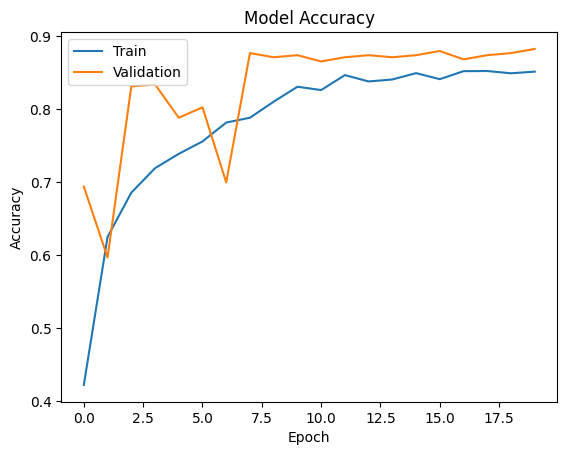

In [ ]:
# Write your code to evaluate your model on test data.  Construct a plot of the training


plt.plot(new_model_history.history['accuracy'])
plt.plot(new_model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

In [ ]:
#Evaluate your model on the test set here

test_images, test_labels = next(test_set)
accuracy = new_model1.evaluate(test_images, test_labels, verbose = 2)


2/2 - 5s - loss: 0.1957 - accuracy: 0.9000 - 5s/epoch - 2s/step


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = new_model1.predict(test_images)
pred = np.argmax(pred, axis = 1)
y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = CATEGORIES, yticklabels = CATEGORIES)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()





2/2 [==============================] - 0s 150ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5
           5       0.50      0.60      0.55         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         5
           9       0.67      0.40      0.50         5

    accuracy                           0.90        50
   macro avg       0.90      0.90      0.90        50
weighted avg       0.90      0.90      0.90        50



**Think About It:**

- What do you infer from the general trend in the training performance?
- Is the training accuracy consistently improving?
- Is the validation accuracy also improving similarly?

**Observations and Insights:__**

## **Conclusion:____________**

### **Insights**


### **Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further? The Vgg16 Model worked the best

### **Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt? I propose using the VGG16 model because it has been trained on thousands of images.